In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

1. Для изображения sar_3.jpg найти наиболее протяженный участок (выделить линии при помощи преобразования Хафа)

In [7]:
image = cv2.imread('sar_3.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

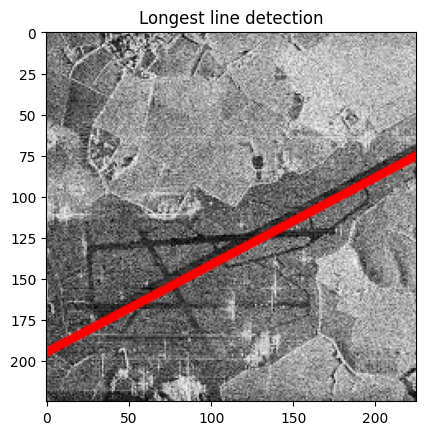

In [8]:
canny = cv2.Canny(image_gray, 100, 150, apertureSize=3)
lines = cv2.HoughLines(canny, 1, np.pi / 180, 140)

max_length = 0
longest_line = None

if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        pt1 = (int(x0 + 1000 * (-b)), int(y0 + 1000 * (a)))
        pt2 = (int(x0 - 1000 * (-b)), int(y0 - 1000 * (a)))
        length = np.sqrt((pt1[0] - pt2[0]) ** 2 + (pt1[1] - pt2[1]) ** 2)
        if length > max_length:
            max_length = length
            longest_line = (pt1, pt2)

if longest_line is not None:
    image_with_line = image.copy()
    cv2.line(image_with_line, longest_line[0], longest_line[1], (0, 0, 255), 3, cv2.LINE_AA)

plt.imshow(cv2.cvtColor(image_with_line, cv2.COLOR_BGR2RGB))
plt.title('Longest line detection')
plt.show()

2. Для изображения sar_3.jpg провести исследование алгоритмов бинаризации, выделить участок дорожной полосы.

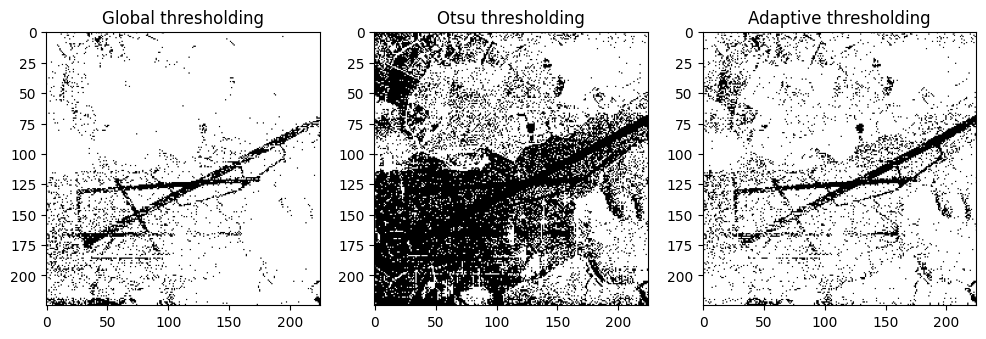

In [9]:
_, global_thresh = cv2.threshold(image_gray, 60, 255, cv2.THRESH_BINARY)
_, otsu_thresh = cv2.threshold(image_gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
adaptive_thresh = cv2.adaptiveThreshold(image_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 101, 45)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
plt.imshow(global_thresh, cmap='gray')
plt.title('Global thresholding')
        
plt.subplot(1, 3, 2)
plt.imshow(otsu_thresh, cmap='gray')
plt.title('Otsu thresholding')

plt.subplot(1, 3, 3)
plt.imshow(adaptive_thresh, cmap='gray')
plt.title('Adaptive thresholding')
        
plt.show()

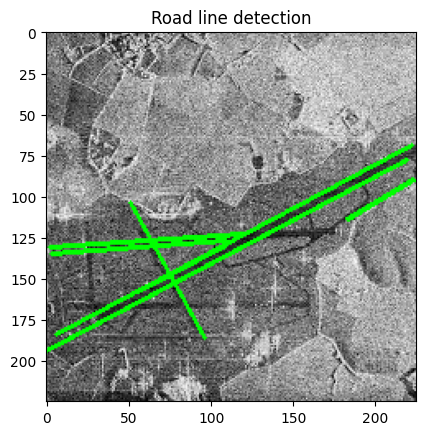

In [10]:
blurred = cv2.GaussianBlur(adaptive_thresh, (7, 7), 0)
canny = cv2.Canny(blurred, 50, 150, apertureSize=3)
lines = cv2.HoughLinesP(canny, 1, np.pi / 180, threshold=80, minLineLength=30, maxLineGap=10)

lane_image = image.copy()
if lines is not None:
    for line in lines:
        x1, y1, x2, y2 = line[0]
        cv2.line(lane_image, (x1, y1), (x2, y2), (0, 255, 0), 2)

plt.imshow(cv2.cvtColor(lane_image, cv2.COLOR_BGR2RGB))
plt.title('Road line detection')
plt.show()